# Study for opening a typical food Restaurant in Toronto-CA 📈


## 1 - Introduction

The objective of this kernel is to analyze opportunities for innovation in the food sector of Toronto-CA, for such prospecting the existence of a typical Brazilian food restaurant within a radius of 10 km will be investigated. In the end, the place that has more typical food restaurants and that does not have a Brazilian restaurant will be chosen.

Brazil is a tropical country with continental dimensions and therefore has a wide variety of typical recipes. Some of them are: "Acarajé", "Moqueca", "Churrasco", "Feijoada"... as the project is about innovation, a deep analysis will not be made in relation to points of competitors and other markets.

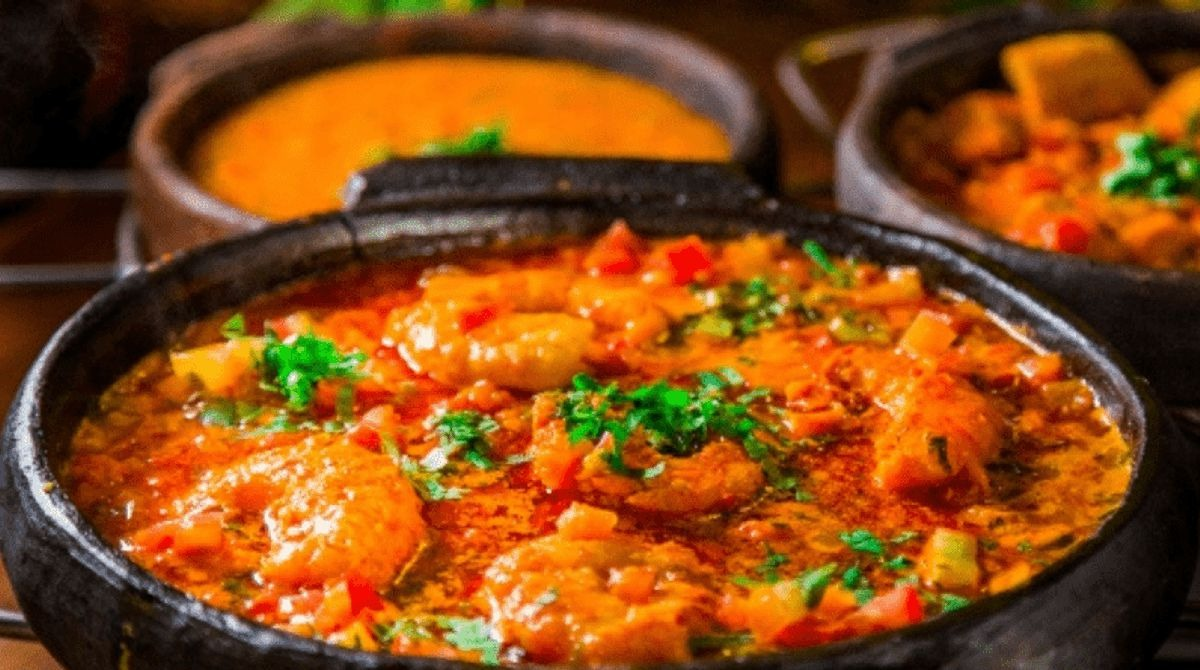


### 1.1 Data

- Web Scraping from Wikipedia
- Coordinates by geocoder library
- Restaurants Forsquare API

## 2 - Methodology

The methodology will be prescriptive, whose objective is to prescribe a market opportunity. Therefore, this study will not focus on a feasibility analysis, only on prospecting the right place to innovate, assuming that the right place for a Brazilian food restaurant is close to many other restaurants. The study will be based on the analysis of georeferenced data that will be classified with a machine learning model, kmeans.

## 3 - Development

#### Importing packages and libraries

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as col
from sklearn.cluster import KMeans
import matplotlib.cm as mtcm

In [241]:
import requests
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

#### Importing data

In [242]:
from bs4 import BeautifulSoup
import numpy as np
soup = BeautifulSoup(website_url, 'html')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limi

#### Clean Data


In [244]:
dicion_pc = {}
td = table.findAll('td')
for i in td: # Abrir cada td e navegar pelas tags
    try:
        postal_code = i.p.b.text # Coletando dados da tag b que está dentro da a Código portal
        neigh = i.span.text # bairros 
        boro = neigh.split('(')[0]
        pc_not = i.span.text # Possível código postal que esteja sem bairros 
        dicion_pc[postal_code] = {}
        try:
            ne = neigh.split('(')[1]
            ne = ne.replace('(', ' ')
            ne = ne.replace(')', ' ')
            neigh_nm = ne.split('/')
            neigh_clean = ', '.join([name.strip() for name in neigh_nm])
        except:
            boro = boro.strip('\n')
            neigh_clean = boro
        dicion_pc[postal_code]['Borough'] = boro
        dicion_pc[postal_code]['Neighborhoods'] = neigh_clean 
    except:
        pass
print(dicion_pc )

{'M1A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M2A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M3A': {'Borough': 'North York', 'Neighborhoods': 'Parkwoods'}, 'M4A': {'Borough': 'North York', 'Neighborhoods': 'Victoria Village'}, 'M5A': {'Borough': 'Downtown Toronto', 'Neighborhoods': 'Regent Park, Harbourfront'}, 'M6A': {'Borough': 'North York', 'Neighborhoods': 'Lawrence Manor, Lawrence Heights'}, 'M7A': {'Borough': "Queen's Park", 'Neighborhoods': 'Ontario Provincial Government'}, 'M8A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M9A': {'Borough': 'Etobicoke', 'Neighborhoods': 'Islington Avenue'}, 'M1B': {'Borough': 'Scarborough', 'Neighborhoods': 'Malvern, Rouge'}, 'M2B': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M3B': {'Borough': 'North York', 'Neighborhoods': 'Don Mills North'}, 'M4B': {'Borough': 'East York', 'Neighborhoods': 'Parkview Hill, Woodbine Gardens'}, 'M5B': {'Borough': 'Downtown Toron

In [245]:
columns = ['Postal_Code', 'Borough', 'Neighborhood']
df = pd.DataFrame(columns=columns)
df.head(20)
for postal_code in dicion_pc:
        boro = dicion_pc[postal_code]['Borough']
        nei = dicion_pc[postal_code]['Neighborhoods']
        df = df.append({"Postal_Code": postal_code, "Borough": boro, "Neighborhood": nei}, ignore_index=True)
df.head(10)

C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\3731487160.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Postal_Code": postal_code, "Borough": boro, "Neighborhood": nei}, ignore_index=True)
C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\3731487160.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Postal_Code": postal_code, "Borough": boro, "Neighborhood": nei}, ignore_index=True)
C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\3731487160.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Postal_Code": postal_code, "Borough": boro, "Neighborhood": nei}, ignore_index=True)
C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\3731487160.py:7: FutureWarning: The frame.

,Postal_Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


#### Create Data Frame


In [246]:
df1 = df[df.Borough != 'Not assigned']
df2 = df1.groupby(['Postal_Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2.head(10)

,Postal_Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [247]:
df2.shape

(103, 3)

#### Importing georeferenced data

In [248]:
geo_data = pd.read_csv('https://cocl.us/Geospatial_data')
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [249]:
geo_data.rename(columns={'Postal Code':'Postal_Code'},inplace=True)
dfF = pd.merge(df2,geo_data,on='Postal_Code')
dfF.head()

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [250]:
dfF[(dfF['Borough']=='Downtown Toronto')]

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
42,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576
48,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817


#### Filter by "Toronto"

In [251]:
df3 = dfF[dfF['Borough'].str.contains('Toronto',regex=False)]
df3

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


#### Visualization and Modeling

<AxesSubplot:xlabel='count', ylabel='Borough'>

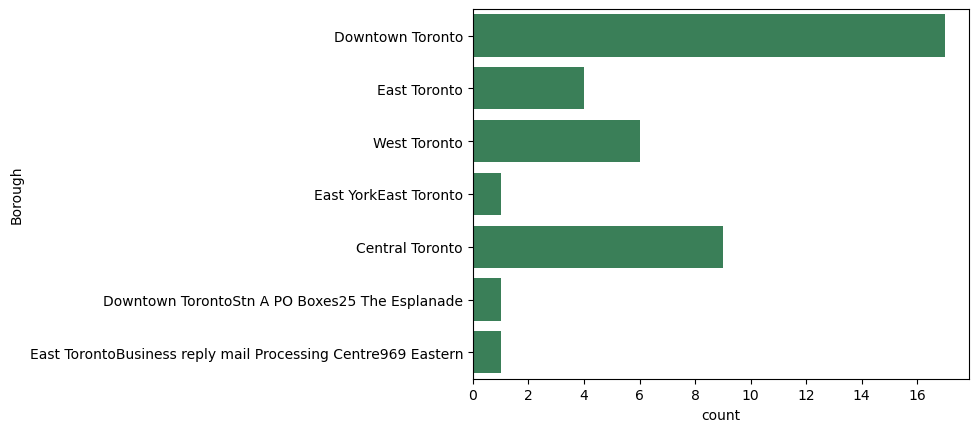

In [252]:
sns.countplot(y=df3['Borough'], color="seagreen")

In [253]:
neigh_Toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for N,E,bor,neighb in zip(df3['Latitude'],df3['Longitude'],df3['Borough'],df3['Neighborhood']):
    label = '{}, {}'.format(neighb, bor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([N,E], radius=5, popup=label, color='green', fill=True, fill_color='#006400', fill_opacity=0.1,
    parse_html=False).add_to(neigh_Toronto)
neigh_Toronto

#### Training the data in the Cluster model

In [254]:
k = 4
cluster = df3.drop(['Postal_Code','Borough','Neighborhood'],1)
km = KMeans(n_clusters = k,random_state=0).fit(cluster)
km.labels_


C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\4284298009.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster = df3.drop(['Postal_Code','Borough','Neighborhood'],1)


array([1, 1, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 3, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3])

#### Inserting the labels in the df


In [255]:
df3.insert(0, 'Class_Cluster', kmeans.labels_)
df3

,Class_Cluster,Postal_Code,Borough,Neighborhood,Latitude,Longitude
2,1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,1,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,3,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,1,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,2,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,1,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,2,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,3,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


In [256]:
map_clust = folium.Map(location=[43.651070,-79.347015],zoom_start=10)
arr = np.arange(k)
vari = [i + arr + (i*arr)**2 for i in range(k)]
colors_array = mtcm.rainbow(np.linspace(0, 1, len(vari)))
arc_iris = [col.rgb2hex(i) for i in colors_array]
for E, O, ng, cluster in zip(df3['Latitude'], df3['Longitude'], df3['Neighborhood'], df3['Class_Cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([E, O], radius=7,popup = label, color=arc_iris[cluster-1], fill=True, fill_color=arc_iris[cluster-1],
    fill_opacity=0.4).add_to(map_clust)
       
map_clust

#### Importing data of Restaurants

In [257]:
import requests
url = "https://api.foursquare.com/v3/places/search?query=restaurant&ll=43.651070%2C-79.347015&radius=5000"
headers = {
    "accept": "application/json",
    "Authorization": "fsq3n3FMAsaaQLw9DCuXivx0Dgjpj98e5DNSf6THTHkPJe8="
}
response = requests.get(url, headers=headers)
print(response.json())


{'results': [{'fsq_id': '57e0745a498ea809dbf75f68', 'categories': [{'id': 13302, 'name': 'Mediterranean Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_', 'suffix': '.png'}}], 'chains': [], 'distance': 663, 'geocodes': {'main': {'latitude': 43.653754, 'longitude': -79.354428}, 'roof': {'latitude': 43.653754, 'longitude': -79.354428}}, 'link': '/v3/places/57e0745a498ea809dbf75f68', 'location': {'address': '494 Front St E', 'country': 'CA', 'cross_street': 'at Bayview', 'formatted_address': '494 Front St E (at Bayview), Toronto ON M5A 0J1', 'locality': 'Toronto', 'postcode': 'M5A 0J1', 'region': 'ON'}, 'name': 'Souk Tabule', 'related_places': {}, 'timezone': 'America/Toronto'}, {'fsq_id': '58233f576a80ef616dbf88ab', 'categories': [{'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}}], 'chains': [], 'distance': 905, 'geocodes': {'drop_off': {'latitude': 43.658549, 'longitude': 

In [259]:
df2 = pd.json_normalize(data_rest, record_path=None)


In [277]:
data_rest = response.json()
data_rest['results'][0]

{'fsq_id': '57e0745a498ea809dbf75f68',
 'categories': [{'id': 13302,
   'name': 'Mediterranean Restaurant',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 663,
 'geocodes': {'main': {'latitude': 43.653754, 'longitude': -79.354428},
  'roof': {'latitude': 43.653754, 'longitude': -79.354428}},
 'link': '/v3/places/57e0745a498ea809dbf75f68',
 'location': {'address': '494 Front St E',
  'country': 'CA',
  'cross_street': 'at Bayview',
  'formatted_address': '494 Front St E (at Bayview), Toronto ON M5A 0J1',
  'locality': 'Toronto',
  'postcode': 'M5A 0J1',
  'region': 'ON'},
 'name': 'Souk Tabule',
 'related_places': {},
 'timezone': 'America/Toronto'}

In [279]:
data_rest = response.json()
name = []
postcode = []
roof = []
for i in range(0, len(data_rest["results"]), 1):
    name.append(data_rest['results'][i]['name'])
    postcode.append(data_rest['results'][i]['location']['postcode'])
    roof.append(data_rest['results'][i]['geocodes']['roof'])
print(name, postcode,roof)

['Souk Tabule', 'White Lily Diner', 'Boxcar Social', 'Tabule', 'Cluny Bistro', 'La Carnita', 'Impact Kitchen', 'Brick Street Bakery', "St John's Bakery", 'Reliable Halibut & Chips'] ['M5A 0J1', 'M4M 1G8', 'M4M 2J3', 'M4M 1H7', 'M5A 3C4', 'M4M 1H4', 'M5A 1M5', 'M5A 3C4', 'M4M 2E9', 'M4M 1J7'] [{'latitude': 43.653754, 'longitude': -79.354428}, {'latitude': 43.658748, 'longitude': -79.351339}, {'latitude': 43.659683, 'longitude': -79.346952}, {'latitude': 43.659775, 'longitude': -79.346452}, {'latitude': 43.650535, 'longitude': -79.357798}, {'latitude': 43.659597, 'longitude': -79.347359}, {'latitude': 43.656146, 'longitude': -79.357052}, {'latitude': 43.650533, 'longitude': -79.359387}, {'latitude': 43.660455, 'longitude': -79.350254}, {'latitude': 43.660945, 'longitude': -79.34112}]


In [296]:
lat , log = [] , []
for i in range(len(roof)):
    lat.append(roof[i]["latitude"])
    log.append(roof[i]['longitude'])
df_r = pd.DataFrame(name)
df_r.insert(1, 'postcode', postcode)
df_r.insert(2,  "latitude", lat)
df_r.insert(2,  "longitude", log)
df_r

,0,postcode,longitude,latitude
0,Souk Tabule,M5A 0J1,-79.354428,43.653754
1,White Lily Diner,M4M 1G8,-79.351339,43.658748
2,Boxcar Social,M4M 2J3,-79.346952,43.659683
3,Tabule,M4M 1H7,-79.346452,43.659775
4,Cluny Bistro,M5A 3C4,-79.357798,43.650535
5,La Carnita,M4M 1H4,-79.347359,43.659597
6,Impact Kitchen,M5A 1M5,-79.357052,43.656146
7,Brick Street Bakery,M5A 3C4,-79.359387,43.650533
8,St John's Bakery,M4M 2E9,-79.350254,43.660455
9,Reliable Halibut & Chips,M4M 1J7,-79.341120,43.660945


In [298]:
df_r.rename(columns={0:'name'},inplace=True)
df_r

,name,postcode,longitude,latitude
0,Souk Tabule,M5A 0J1,-79.354428,43.653754
1,White Lily Diner,M4M 1G8,-79.351339,43.658748
2,Boxcar Social,M4M 2J3,-79.346952,43.659683
3,Tabule,M4M 1H7,-79.346452,43.659775
4,Cluny Bistro,M5A 3C4,-79.357798,43.650535
5,La Carnita,M4M 1H4,-79.347359,43.659597
6,Impact Kitchen,M5A 1M5,-79.357052,43.656146
7,Brick Street Bakery,M5A 3C4,-79.359387,43.650533
8,St John's Bakery,M4M 2E9,-79.350254,43.660455
9,Reliable Halibut & Chips,M4M 1J7,-79.341120,43.660945


In [302]:
for i in range(10):
    df_r['postcode'][i] = df_r['postcode'][i][0:3]
df_r

C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\3471594775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['postcode'][i] = df_r['postcode'][i][0:3]


,name,postcode,longitude,latitude
0,Souk Tabule,M5A,-79.354428,43.653754
1,White Lily Diner,M4M,-79.351339,43.658748
2,Boxcar Social,M4M,-79.346952,43.659683
3,Tabule,M4M,-79.346452,43.659775
4,Cluny Bistro,M5A,-79.357798,43.650535
5,La Carnita,M4M,-79.347359,43.659597
6,Impact Kitchen,M5A,-79.357052,43.656146
7,Brick Street Bakery,M5A,-79.359387,43.650533
8,St John's Bakery,M4M,-79.350254,43.660455
9,Reliable Halibut & Chips,M4M,-79.341120,43.660945


In [307]:
k = 2
cluster = df_r.drop(['name','postcode'],1)
km = KMeans(n_clusters = k,random_state=0).fit(cluster)
km.labels_

C:\Users\lucre\AppData\Local\Temp\ipykernel_9744\1322401795.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster = df_r.drop(['name','postcode'],1)


array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

#### Modeling 

In [305]:
df_r.insert(0, 'Class_Cluster', km.labels_)
map_clust = folium.Map(location=[43.651070,-79.347015],zoom_start=10)
arr = np.arange(k)
vari = [i + arr + (i*arr)**2 for i in range(k)]
colors_array = mtcm.rainbow(np.linspace(0, 1, len(vari)))
arc_iris = [col.rgb2hex(i) for i in colors_array]
for E, O, ng, cluster in zip(df_r['latitude'], df_r['longitude'], df_r['name'], df_r['Class_Cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([E, O], radius=7,popup = label, color=arc_iris[cluster-1], fill=True, fill_color=arc_iris[cluster-1],
    fill_opacity=0.4).add_to(map_clust)
       
map_clust

## 4 - Conclusion

#### It is possible to state that Queen Street East is the most strategic location within a 10 km radius in Toronto-CA.